In [1]:
#DataHandler
from numpy import arctan, ceil
from CristhValuesArrays import Gamma,dGamma
from SpacetimeController import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import axes3d, Axes3D

import time

# seq_parse.py

# from typing import Dict, List, Tuple
# import collections
# import re
import sys

# USAGE = (f"Usage: {sys.argv[0]} "
#          "[--help] | [-s <sep>] [first [incr]] last")

# def seq(operands: List[int], sep: str = "\n") -> str:
#     first, increment, last = 1, 1, 1
#     if len(operands) == 1:
#         last = operands[0]
#     if len(operands) == 2:
#         first, last = operands
#         if first > last:
#             increment = -1
#     if len(operands) == 3:
#         first, increment, last = operands
#     last = last + 1 if increment > 0 else last - 1
#     return sep.join(str(i) for i in range(first, last, increment))

# def parse(args: List[str]) -> Tuple[str, List[int]]:
#     arguments = collections.deque(args)
#     separator = "\n"
#     operands: List[int] = []
#     while arguments:
#         arg = arguments.popleft()
#         if not len(operands):
#             if arg == "--help":
#                 print(USAGE)
#                 sys.exit(0)
#             if arg in ("-s", "--separator"):
#                 separator = arguments.popleft() # if arguments else None
#                 continue
#         try:
#             operands.append(int(arg))
#         except ValueError:
#             raise SystemExit(USAGE)
#         if len(operands) > 3:
#             raise SystemExit(USAGE)

#     return separator, operands

# def main() -> None:
#     sep, operands = parse(sys.argv[1:])
#     if not operands:
#         raise SystemExit(USAGE)
#     print(seq(operands, sep))

# if __name__ == "__main__":
#     main()


In [ ]:
opts = [opt for opt in sys.argv[1:] if opt.startswith("-")]
args = [arg for arg in sys.argv[1:] if not arg.startswith("-")]

# args[0] could be tau_end or Nsteps, or args[4] since the vector graphs dont require it
# options: one source, n-sources
#OR I could have one function to calculate z's then pipe that output to the input
# maybe args should each be arg_name=value
#### def Plot r vs tau, theta vs tau and phi vs tau ####
Base_Convergence_graphs=True if ('-unpert' in opts) or ('-u' in opts) else False
Pert_Stability_graphs=True if ('-stab' in opts) or ('-s' in opts) else False
Pert_Convergence_graphs=True if ('-conv' in opts) or ('-c' in opts) else False

### def Plot_Acceleration_Fields
Plot_Acceleration_Fields=True if ('-vector' in opts) or ('-v' in opts) else False

In [97]:
# start=time.perf_counter()
# restart=start
M=1

a= 0.5# float(args[0]) if len(args) else .001
# [p,e,x]= [10.0,0,1] #[float(x) for x in args[1:4]] if len(args) else [10.0,0,1] #These and the z's should be reported for reproducibility. Don't let x=0.
# Not currently validating input

0 0 0.1321064928519551
0 1 0.009558239311240625
0 2 0.041685422895031916
0 3 0.04168565676341894
1 1 0.15399567197392966
1 2 0.6727237666116078
1 3 0.04812340794048187
2 2 11.30935876332274
2 3 0.6781122950527528
3 3 16.29493519848124


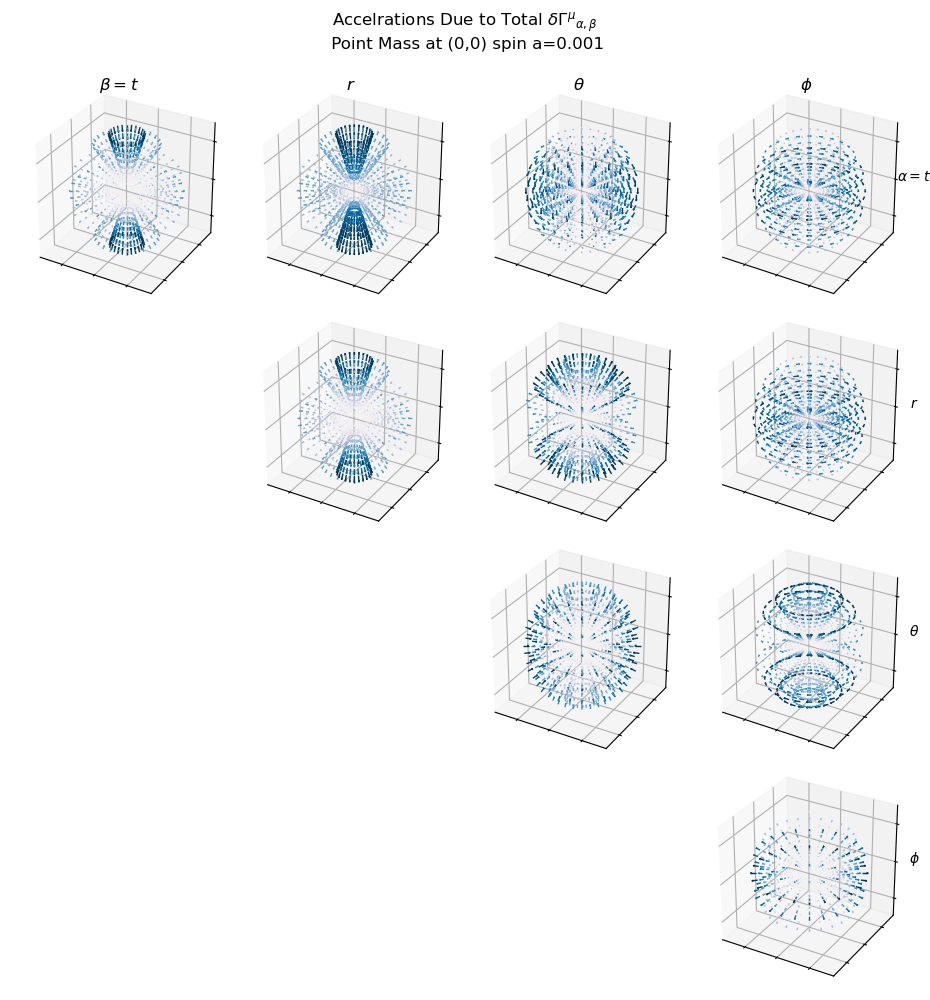

In [28]:
# if Plot_Acceleration_Fields:
PertST={}
PertST_dGamma_Fields={}
# PertST_Accel_Fields={}

eps=0.1#10**(-6)
# theta_p,phi_p=np.pi/2,0
# PertST[(theta_p,phi_p)]={}
for (theta_p,phi_p) in [(0,0)]:#,(np.pi/2,0),(0,np.pi/2),(np.pi/4,0),(np.arccos(1/np.sqrt(3)),0)]:# 
    PertST[(theta_p,phi_p)]={}
    PertST[(theta_p,phi_p)][eps]=Spacetime(a)
    PertST[(theta_p,phi_p)][eps].Add_Perturbation_Source('point',theta_p,phi_p,Epsilon=eps)
    PertST_zs=PertST[(theta_p,phi_p)][eps].NetPerturbation.z_array # Perturbers['NetPerturbation'].z_array
    # print(PertST[(theta_p,phi_p)][eps].Perturbers['NetPerturbation'].z_array,PertST[(theta_p,phi_p)][eps].Perturbers["PointMasses"][0].z_array,PertST_zs)
    # Make the 3D grid
    # These settings may need adjusting for various distributions
    # zoom=1.5*p/(1-e) # scale the plot to fit the orbit
    # ds=zoom/5.1 # random decimals help avoid singularities in the meshgrid
                # A more rigorous method should be found to avoid evaluating field
                # points at the exact location of any Body. 
    

    view_rad,step_rad,step_th,step_phi=16,1.85,np.pi/10,np.pi/12
    rads,thetas,phis=np.meshgrid(np.arange(M+np.sqrt(M*M-a*a)+step_rad, view_rad, step_rad), 
                                np.arange(step_th, np.pi, step_th),
                                np.arange(0, 2*np.pi-step_phi, step_phi))
    
    sqrsqasq=np.sqrt(rads*rads+a*a)
    sqSigmas=np.sqrt(rads*rads+a*a*np.cos(thetas)**2)

    X,Y,Z=sqrsqasq*np.sin(thetas)*np.cos(phis),sqrsqasq*np.sin(thetas)*np.sin(phis),rads*np.cos(thetas) # replace phis -> phis-np.arctan(a/rads) ?
    # x, y, z = np.meshgrid(np.arange(-zoom, zoom, ds), # x is overloaded
    #                     np.arange(-zoom, zoom, ds),
    #                     np.arange(-zoom, zoom, ds))
        
    # rad_x,th_x,ph_x= np.sqrt(x*x+y*y+z*z), np.arctan(np.sqrt(x*x+y*y)/z), np.arctan(y/x)

    def unique_dGamma(r,t,p): return -dGamma(M,a,r,t,p,PertST_zs)#.real
    vectorized_dGamma=np.vectorize(unique_dGamma,cache=True,signature='(),(),()->(d,d,d)')#,excluded=[0,1,5]
    PertST_dGamma_Fields[tuple(PertST_zs)]=vectorized_dGamma(rads,thetas,phis)

    # def acceleration(r,t,p):
    #     u=np.array([-1,0,0,1]) # purely azimuthal initial velocity assumed to be constant everywhere
    #     return -1*np.einsum('ijk,j,k->i',dGamma(M,a,r,t,p,PertST_zs).real,u,u)
    # v_accel=np.vectorize(acceleration,cache=True,signature='(),(),()->(a)')
    # PertST_Accel_Fields[tuple(PertST_zs)]=v_accel(rads,thetas,phis)

    # Generate 3D plots
    # plt.close('all')

    vectorPlots=plt.figure(figsize=(10,10))#, constrained_layout=True)
    # # vectorPlots=vectorPlotsfig.subfigures(4,4)
    # # spec= vectorPlots.add_gridspec(4,4)
    gs = GridSpec(4,4, figure=vectorPlots, wspace=0,hspace=0)
    threeDfigs={}
    threeDaxs={}
    str_coords=['t','r','\\theta','\\phi']
    for i in range(0,4):
        for j in range(i,4):
            # threeDfigs[(i,j)]=plt.figure()
            threeDaxs[(i,j)] = vectorPlots.add_subplot(gs[i,j],projection='3d')
            if i==0: 
                if j==0: threeDaxs[(i,j)].set_title('$\\beta=t$   ')
                else: threeDaxs[(i,j)].set_title(f'${str_coords[j]}$')
            if j==3: 
                if i==0: 
                    rowname='$\\alpha=t$'
                    ha='center'
                else: 
                    rowname= f'${str_coords[i]}$'
                    ha='center'
                threeDaxs[(i,j)].text(21,21,0,rowname, ha=ha, va='center')

            #  = Axes3D(threeDfigs[(i,j)]) #fig.gca(projection='3d')
            # vectorPlots[i,j] = vectorPlots.add_subfigure(gs[i,j])#,projection='3d')
            # threeDaxs[(i,j)] = Axes3D(threeDfigs[(i,j)]) #fig.gca(projection='3d')
            

            # T=PertST_dGamma_Fields[tuple(PertST_zs)][:,:,:,0,i,j]
            
            R=PertST_dGamma_Fields[tuple(PertST_zs)][:,:,:,1,i,j]#/T  
            TH=PertST_dGamma_Fields[tuple(PertST_zs)][:,:,:,2,i,j]#/T
            PH=PertST_dGamma_Fields[tuple(PertST_zs)][:,:,:,3,i,j]#/T
            # # T=PertST_Accel_Fields[tuple(PertST_zs)][:,:,:,0]
            # R=PertST_Accel_Fields[tuple(PertST_zs)][:,:,:,1]#/T
            # TH=PertST_Accel_Fields[tuple(PertST_zs)][:,:,:,2]#/T
            # PH=PertST_Accel_Fields[tuple(PertST_zs)][:,:,:,3]#/T

            U=R*np.sin(thetas)*np.cos(phis)*rads/sqSigmas+TH*np.cos(thetas)*np.cos(phis)*sqrsqasq/sqSigmas-PH*np.sin(phis)
            V=R*np.sin(thetas)*np.sin(phis)*rads/sqSigmas+TH*np.cos(thetas)*np.sin(phis)*sqrsqasq/sqSigmas+PH*np.cos(phis)
            W=(R*np.cos(thetas)*sqrsqasq-TH*np.sin(thetas)*rads)/sqSigmas

            mags = np.sqrt(U*U+V*V+W*W) # Used for coloring.
            cap=.5*max(mags.flatten()) # Assign a max and min color value so that a range
            # Lowcap=cap/10             # naturally appears.
            print(i,j,cap)
            # mags[mags > cap] = cap
            # mags[mags < Lowcap] = Lowcap
            # Appropriately colored 3d quiver plot
            colors=np.concatenate((mags.flatten(),np.repeat(mags.flatten(),2)))
            q=threeDaxs[(i,j)].quiver(X,Y,Z, U, V, W,length=1/(cap*1.25),lw=1,pivot='middle',cmap='PuBu')
            q.set_array(colors)
            threeDaxs[(i,j)].axes.xaxis.set_ticklabels([])
            threeDaxs[(i,j)].axes.yaxis.set_ticklabels([])
            threeDaxs[(i,j)].axes.zaxis.set_ticklabels([])
            # cax = fig.add_axes([ax.get_position().x1+0.01,
            #     ax.get_position().y0,
            #     0.02,
            #     ax.get_position().height])
            # # Plot vertical colorbar
            # plt.colorbar(im, cax=cax)
            # threeDfigs[(i,j)].colorbar(q,fraction=.001*cap, pad=0.04) #Units are currently un-specified.

            # # Also plot the positions of the Bodies
            # ax.scatter(np.array(genpos).transpose()[0],\
            #             np.array(genpos).transpose()[1],\
            #             np.array(genpos).transpose()[2],label='Stars')
            # and plot the Center of Mass
            # ax.scatter(com.x(),com.y(),com.z(),c='r',label='CoM')

            # threeDaxs[(i,j)].legend()
            # threeDfigs[(i,j)].suptitle(f'{i,j}')#
            # threeDfigs[(i,j)].set_figheight(8)
            # threeDfigs[(i,j)].set_figwidth(12)
            # plt.show()
    vectorPlots.subplots_adjust(wspace=0,hspace=0,top=0.91,bottom=0,left=0.045,right=0.955)
    vectorPlots.suptitle('Accelrations Due to Total $\\delta\\Gamma^\\mu{}_{\\alpha,\\beta}$ \n Point Mass at '+f'({theta_p},{phi_p}) spin a={a}')
    # plt.savefig(f'Ring_{theta_p}_{phi_p}_Accels_w_spin_{a}.pdf',format='pdf')#
    plt.show()

In [72]:
phi_p

-3.141592653589793

In [77]:
#Point Mass
PertST={}
PertST_dGamma_Fields={}

eps=0.1#10**(-6)
theta_p,phi_p=np.pi/3,0
PertST[(theta_p,phi_p)]={}
#,(np.pi/2,0),(0,np.pi/2),(np.pi/4,0),(np.arccos(1/np.sqrt(3)),0)]:# 
    # PertST[(theta_p,phi_p)]={}
PertST[(theta_p,phi_p)][eps]=Spacetime(a)
PertST[(theta_p,phi_p)][eps].Add_Perturbation_Source('point',theta_p,phi_p,Epsilon=eps)
PertST_zs=PertST[(theta_p,phi_p)][eps].NetPerturbation.z_array # Perturbers['NetPerturbation'].z_array


def point_dGamma(r,t,p): return -dGamma(M,a,r,t,p,PertST_zs)#.real
vectorized_dGamma=np.vectorize(point_dGamma,cache=True,signature='(),(),()->(d,d,d)')#,excluded=[0,1,5]
PertST_dGamma_Fields[tuple(PertST_zs)]=vectorized_dGamma(rads,thetas,phis)

        
P_R=PertST_dGamma_Fields[tuple(PertST_zs)][:,:,:,1,i,j]#/T  
P_TH=PertST_dGamma_Fields[tuple(PertST_zs)][:,:,:,2,i,j]#/T
P_PH=PertST_dGamma_Fields[tuple(PertST_zs)][:,:,:,3,i,j]#/T

In [95]:
#Ring Mass
PertST={}
PertST_dGamma_Fields={}

phi_p+=np.pi/2
PertST[(theta_p,phi_p)]={}
#,(np.pi/2,0),(0,np.pi/2),(np.pi/4,0),(np.arccos(1/np.sqrt(3)),0)]:# 
    # PertST[(theta_p,phi_p)]={}
PertST[(theta_p,phi_p)][eps]=Spacetime(a)
PertST[(theta_p,phi_p)][eps].Add_Perturbation_Source('ring',theta_p,phi_p,Epsilon=eps)
PertST_zs=PertST[(theta_p,phi_p)][eps].NetPerturbation.z_array # Perturbers['NetPerturbation'].z_array

def ring_dGamma(r,t,p): return -dGamma(M,a,r,t,p,PertST_zs)#.real
vectorized_dGamma=np.vectorize(ring_dGamma,cache=True,signature='(),(),()->(d,d,d)')#,excluded=[0,1,5]
PertST_dGamma_Fields[tuple(PertST_zs)]=vectorized_dGamma(rads,thetas,phis)
       
R_R=PertST_dGamma_Fields[tuple(PertST_zs)][:,:,:,1,i,j]#/T  
R_TH=PertST_dGamma_Fields[tuple(PertST_zs)][:,:,:,2,i,j]#/T
R_PH=PertST_dGamma_Fields[tuple(PertST_zs)][:,:,:,3,i,j]#/T

In [96]:
[P_R+R_R,P_TH+R_TH,P_PH+R_PH]

[array([[[ -0.03269556,  -0.03350635,  -0.03536773, ...,  -0.03674991,
           -0.03537264,  -0.03350822],
         [ -0.09563718,  -0.10032785,  -0.11194475, ...,  -0.1238843 ,
           -0.11194866,  -0.1003274 ],
         [ -0.18504688,  -0.19853244,  -0.23275214, ...,  -0.27089227,
           -0.23275133,  -0.19852678],
         ...,
         [ -0.42815867,  -0.48136504,  -0.61914653, ...,  -0.78248091,
           -0.61912557,  -0.48134059],
         [ -0.57430483,  -0.66213019,  -0.89077787, ...,  -1.16603749,
           -0.89074155,  -0.66209221],
         [ -0.73180721,  -0.86655269,  -1.2187282 , ...,  -1.64741949,
           -1.21867301,  -0.86649843]],
 
        [[ -0.25415718,  -0.25055803,  -0.23867723, ...,  -0.2157083 ,
           -0.23874579,  -0.25059199],
         [ -0.80703483,  -0.80157184,  -0.77971073, ...,  -0.72703113,
           -0.77987016,  -0.80164803],
         [ -1.68346834,  -1.68240323,  -1.66429766, ...,  -1.58957656,
           -1.66457492,  -1.6825

In [ ]:
### Make a function to fill dictionaries and a function to make plots when given a dictionary
# gs1 = gridspec.GridSpec(3, 3)
# gs1.update(left=0.1, right=0.9, bottom=0.5, hspace=0.0)
# ax0a = plt.subplot(gs1[0, :])
# ax0b = plt.subplot(gs1[1, :])
# ax0c = plt.subplot(gs1[2, :])
# ax0a.set_xticklabels([])
# ax0b.set_xticklabels([]) 
# ax0a.plot(x,y)
# nbins = len(ax0a.get_xticklabels())
# ax0a.yaxis.set_major_locator(MaxNLocator(nbins=nbins, prune='upper'))
# ax0b.plot(x,y)
# ax0b.yaxis.set_major_locator(MaxNLocator(nbins=nbins, prune='upper'))
# ax0c.plot(x,y)
# ax0c.yaxis.set_major_locator(MaxNLocator(nbins=nbins, prune='upper'))

# # play around with location and font of offset text here
# ax0a.get_yaxis().get_offset_text().set_x(-0.075)
# ax0a.get_yaxis().get_offset_text().set_size(10)
# ax0b.get_yaxis().get_offset_text().set_x(-0.075)
# ax0b.get_yaxis().get_offset_text().set_size(10)
# ax0c.get_yaxis().get_offset_text().set_x(-0.075)
# ax0c.get_yaxis().get_offset_text().set_size(10)
# plt.show()

In [123]:
[p,e,x]= [10.0,0,1]

tau_end,Nsteps=5*10**3,5 # tau_end= 10000*ceil(T_orbit_for_r_min)
times=np.linspace(0,tau_end,tau_end)#,ceil(tau_end/7).astype(np.int64)#*10)# tau_end/floor(T_orbit_for_r_min)*20 or 10000orbits*20 or more

exps=np.arange(9,14.) #exponents for the integration tolerances
eps_ar=[0.,1e-9,33e-8,67e-8,1e-6] #,10**(-12),10**(-5)] 1e-5 diverges, 1e-6 diverges for off equator perturbers

In [124]:
#Test Stability and Convergence when Unperturbed 
KerrST=Spacetime(a)
KerrG=KerrST.GeodesicConstructor(p,e,x) #This stores a set, or dict, of Geodesics called 'Trajectories' both in a new dictionary, KerrG, and in KerrST.Geodesics

del_r_max=np.zeros(6) # tracker of max variance of base orbit from r0 for when e=0, contains the max vals of del_r for each exp of tolerance
t_delr_max=np.zeros(6) # the times for del_r_max
del_theta_max=np.zeros(6) # tracker of max variance of base orbit from th0 for when x=+/-1, contains the max vals of del_theta for each exp of tolerance
t_delth_max=np.zeros(6) # the times for del_theta_max
base_arrays={
    't':[],
    'pos':{
        'r':[],
        'theta':[],
        'phi':[]
        },
    'vel': {
        'r':[],
        'theta':[],
        'phi':[]
        },
    'acc':{
        'r':[],
        'theta':[],
        'phi':[]
        },
    'jerk':{
        'r':[],
        'theta':[],
        'phi':[]
        },
    'hplus':[],
    'hcross':[]
    }

# del_r_arrays=[]
# del_theta_arrays=[]

for i in range(exps.size):
    rtol, atol = 10.**(-exps[i]), 10.**(-exps[i])
    # KerrST.tau_array=times
    base_sol=KerrST.run_Trajectory(KerrG.Trajectories[(0,0,0)],t_eval=times,rtol=rtol,atol=atol)
    #ODE(KerrST.IntRHS(),[0,tau_end],KerrG.Trajectories[(0,0,0)].ICs.flatten(),t_eval=times,rtol=rtol,atol=atol)# Pre-set times makes it take significantly longer
    # print(f"Unperturbed with tol={rtol}: time to integrate {tau_end} steps: {time.perf_counter()-restart}")
    # base_arrays['t'].append(base_sol.t)
    base_arrays['pos']['r'].append(base_sol[0,1])
    base_arrays['pos']['theta'].append(base_sol[0,2])
    base_arrays['pos']['phi'].append(base_sol[0,3])
    # base_vt_arrays.append()
    base_arrays['vel']['r'].append(base_sol[1,1])
    base_arrays['vel']['theta'].append(base_sol[1,2])
    base_arrays['vel']['phi'].append(base_sol[1,3])
    # base_at_arrays.append()
    base_arrays['acc']['r'].append(base_sol[2,1])
    base_arrays['acc']['theta'].append(base_sol[2,2])
    base_arrays['acc']['phi'].append(base_sol[2,3])
    # base_jt_arrays.append()
    base_arrays['jerk']['r'].append(base_sol[3,1])
    base_arrays['jerk']['theta'].append(base_sol[3,2])
    base_arrays['jerk']['phi'].append(base_sol[3,3])

    # base_kinematics=np.reshape(np.transpose(base_sol),(len(base_sol.t),4,4))
    base_hplusList, base_hcrossList=KerrST.calc_Strain(KerrG.Trajectories[(0,0,0)])# kluge_h(base_sol)
    base_arrays['hplus'].append(np.array(base_hplusList))
    base_arrays['hcross'].append(np.array(base_hcrossList))

    # t_array_len= base_sol.t.size
    # print("tau_end=",base_sol.t[-1],"base_sol runtime=",time.perf_counter()-start,"sol.t length=",base_sol.t.shape)
    # print("base size=",base_sol.shape,base_sol.nfev)
    # if e==0:
    #     r0=p
    #     del_r=[0.]
    #     for j in range(1,base_sol.t.size):
    #         r=base_sol[0,1][j]

    #         if abs(del_r[-1])<abs(r-r0): 
    #             del_r_max[i]=r-r0
    #             t_delr_max[i]=base_sol.t[j]
                
    #         del_r.append(r-r0)
    #     del_r_arrays.append(del_r)

    # if x*x==1:
    #     th0=np.pi/2
    #     del_theta=[0.]
    #     for j in range(1,base_sol.t.size):
    #         theta=base_sol[0,2][j]
            
    #         if abs(del_theta[-1])<abs(theta-th0): 
    #             del_theta_max[i]=theta-th0
    #             t_delth_max[i]=base_sol.t[j]
            
    #         del_theta.append(theta-th0)
    #     del_theta_arrays.append(del_theta)
    # # print("Del_r=",del_r)

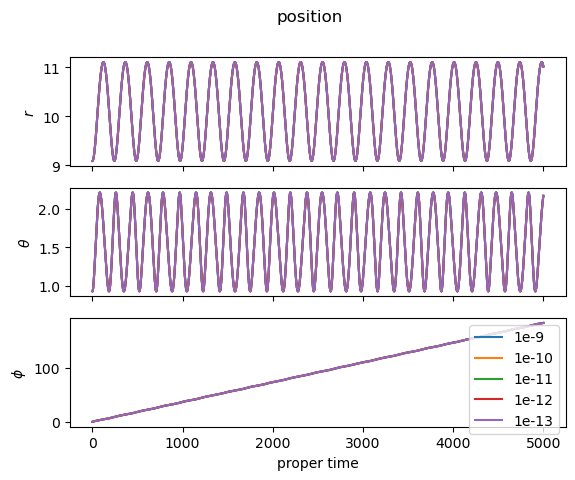

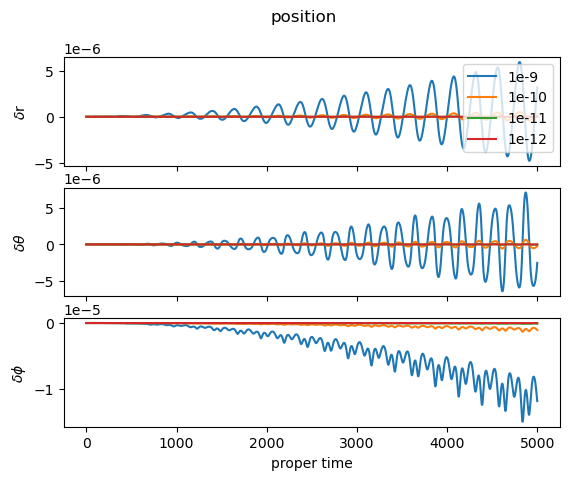

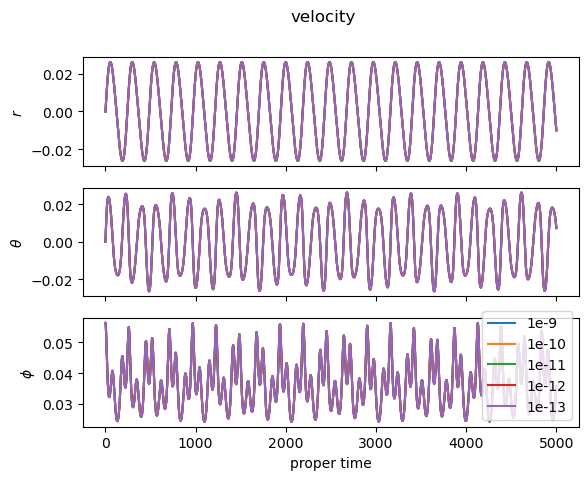

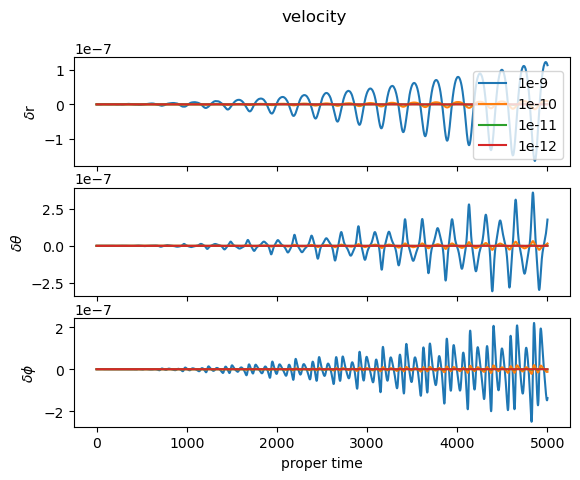

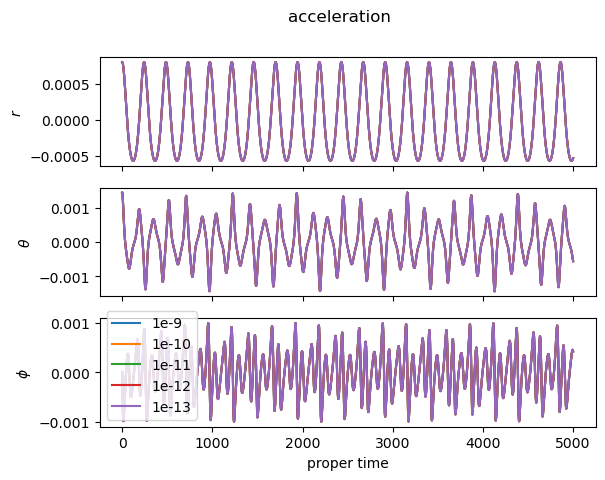

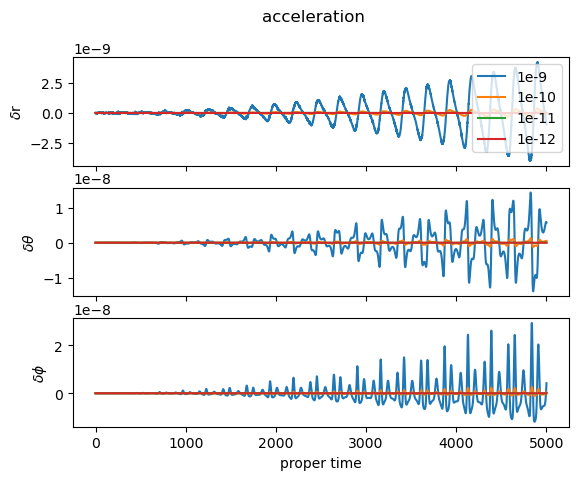

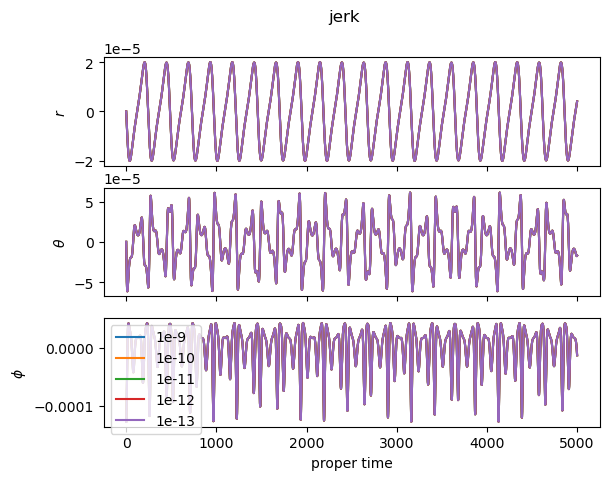

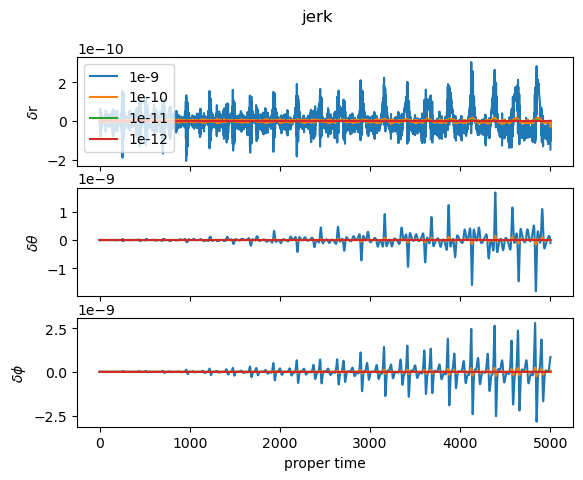

In [110]:
# varbasefigs,varbaseaxs= plt.subplots(2,2)

for var in ['pos','vel','acc','jerk']: #
    #fig_base_sols: 8x6 base_sol[j][i] vs base_t_arrays[i]
    fig_base_sols, axs_base=plt.subplots(3,1)
    # for c in range(4): # columns (not t),r,th,ph
    for exp in range(exps.size): # tol exp
        axs_base[0].plot(times,base_arrays[var]['r'][exp],label="1e-%d" % exps[exp])
        axs_base[1].plot(times,base_arrays[var]['theta'][exp],label="1e-%d" % exps[exp])
        axs_base[2].plot(times,base_arrays[var]['phi'][exp],label="1e-%d" % exps[exp])
            # axs_base[1,c].plot(base_t_arrays[exp],del_r_arrays[exp],label="1e-%f" % exps[exp])# row for velocity
    axs_base[2].set_xlabel('proper time')
    axs_base[0].set_ylabel('$r$')
    # axs_base[0].legend()
    axs_base[1].set_xticklabels([])# [1].set_xlabel('proper time')# sharex(axs_base[2])
    axs_base[1].set_ylabel('$\\theta$')
    # axs_base[1].legend()
    axs_base[0].set_xticklabels([])# [0].set_xlabel('proper time')# sharex(axs_base[2])
    axs_base[2].set_ylabel('$\\phi$')
    # # move the y-axis scale text to the left of the plots
    # ax0a.get_yaxis().get_offset_text().set_x(-0.075)
    # ax0a.get_yaxis().get_offset_text().set_size(10)
    axs_base[2].legend()
    if var == 'pos':fig_base_sols.suptitle('position')#(f'Unperturbed Convergence: a,p,e,x = {a,p,e,x}')
    if var == 'vel':fig_base_sols.suptitle('velocity')
    if var == 'acc':fig_base_sols.suptitle('acceleration')
    if var == 'jerk':fig_base_sols.suptitle('jerk')
    # fig_base_sols.set_figheight(8)
    # fig_base_sols.set_figwidth(12)
    # fig_base_sols.subplots_adjust(hspace=0,top=0.91,bottom=0,left=0.045,right=0.955)
    plt.savefig(f'Unpert_params_{a}_{p}_{e}_{x}_{var}_t{tau_end}.pdf',format='pdf')
    # plt.show()
            
    #fig_base_del_r for exp in exps: 6 plots of del_r_arrays[i] vs base_t_arrays[i]

    #fig_base_del_th for exp in exps: 6 plots of del_theta_arrays[i] vs base_t_arrays[i]
    fig_base_del, (ax_base_del_r,ax_base_del_th,ax_base_del_ph)=plt.subplots(3,1)
    for i in range(exps.size-1):
        ax_base_del_r.plot(times,base_arrays[var]['r'][i]-base_arrays[var]['r'][-1],label="1e-%d" % exps[i])#del_r_arrays[i]
        ax_base_del_th.plot(times,base_arrays[var]['theta'][i]-base_arrays[var]['theta'][-1],label="1e-%d" % exps[i])#del_theta_arrays[i]
        ax_base_del_ph.plot(times,base_arrays[var]['phi'][i]-base_arrays[var]['phi'][-1],label="1e-%d" % exps[i])#del_theta_arrays[i]
    ax_base_del_ph.set_xlabel('proper time')
    ax_base_del_ph.set_ylabel('$\\delta\\phi$')
    ax_base_del_r.set_xticklabels([])# r.set_xlabel('proper time')# sharex(ax_base_del_ph)
    ax_base_del_r.set_ylabel('$\\delta$r')
    ax_base_del_th.set_xticklabels([])# th.set_xlabel('proper time')# sharex(ax_base_del_ph)
    ax_base_del_th.set_ylabel('$\\delta\\theta$')
    ax_base_del_r.legend()
    # ax_base_del_th.legend()
    # ax_base_del_ph.legend()
    # fig_base_del.suptitle(f"Unperturbed Deviations from tol=1e-{exps[-1]}: a,p,e,x = {a,p,e,x}")
    if var == 'pos':fig_base_del.suptitle('position')
    if var == 'vel':fig_base_del.suptitle('velocity')
    if var == 'acc':fig_base_del.suptitle('acceleration')
    if var == 'jerk':fig_base_del.suptitle('jerk')
    # fig_base_del.set_figheight(8)
    # fig_base_del.set_figwidth(12)
    plt.savefig(f'UnpertDeviations_tol1e-{exps[-1]}_params_{a}_{p}_{e}_{x}_{var}_t{tau_end}.pdf',format='pdf')
    # plt.show()

    # #fig_max_base_dels 2 scatter plots: del_r_max and t_base_delr_max vs tol and del_theta_max and t_base_delth_max vs tol
    # fig_max_base_dels, (ax_dr_max,ax_dth_max)=plt.subplots(1,2)
    # sizes=10*exps
    # cb1=ax_dr_max.scatter(t_base_delr_max,del_r_max,s=sizes,c=exps,cmap='RdBu_r')
    # ax_dr_max.set_title('Max $\\delta$r')
    # fig_max_base_dels.colorbar(cb1,ax=ax_dr_max)
    # if x*x==1: 
    #     cb2=ax_dth_max.scatter(t_base_delth_max,del_theta_max,s=sizes,c=exps,cmap='RdBu_r')
    #     ax_dth_max.set_title('Max $\\delta\\theta$')
    #     fig_max_base_dels.colorbar(cb2,ax=ax_dth_max)
    # fig_max_base_dels.suptitle("Tolerance Exp = marker size")
    # # fig_max_base_dels.set_figheight(8)
    # # fig_max_base_dels.set_figwidth(12)
    # # plt.savefig('UnpertMaxDevs_t{tau_end}.pdf',format='pdf')
    # plt.show()

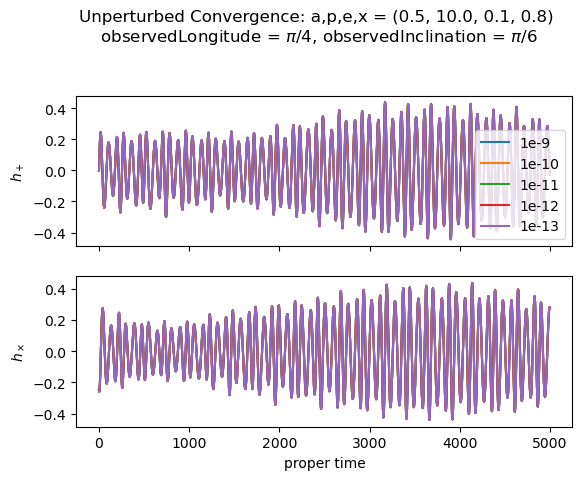

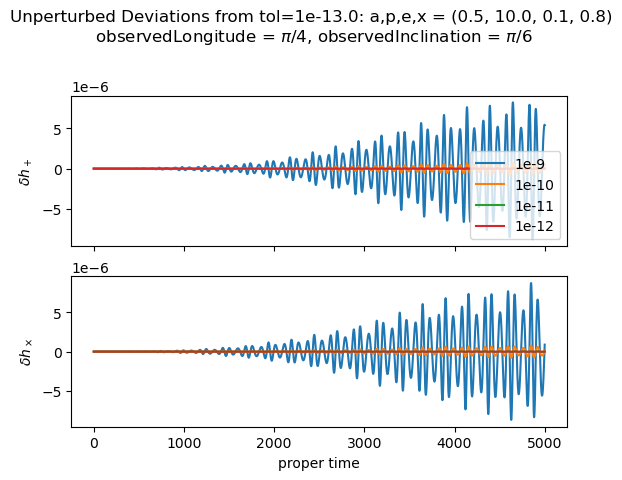

In [111]:
# h_plus, h_cross plots
fig_base_kluge, (ax_base_k_hp,ax_base_k_hc)=plt.subplots(2,1)
for i in range(exps.size):
    ax_base_k_hp.plot(times,base_arrays['hplus'][i],label="1e-%d" % exps[i])#del_r_arrays[i]
    ax_base_k_hc.plot(times,base_arrays['hcross'][i],label="1e-%d" % exps[i])#del_theta_arrays[i]

ax_base_k_hc.set_xlabel('proper time') # or coordinate time?
ax_base_k_hp.set_ylabel('$h_+$')
ax_base_k_hp.set_xticklabels([])# hp.set_xlabel('proper time')# sharex(ax_base_k_hc)
ax_base_k_hc.set_ylabel('$h_\\times$')
ax_base_k_hp.legend()
# ax_base_k_hc.legend()
fig_base_kluge.suptitle(f"Unperturbed Convergence: a,p,e,x = {a,p,e,x}\n observedLongitude = $\\pi/4$, observedInclination = $\\pi/6$")
# fig_base_kluge.set_figheight(8)
# fig_base_kluge.set_figwidth(12)
fig_base_kluge.subplots_adjust(top=0.8)
plt.savefig(f'Unpert_params_{a}_{p}_{e}_{x}_strain_t{tau_end}.pdf',format='pdf')
# plt.show()
# Deltas
fig_base_del_kluge, (ax_base_del_k_hp,ax_base_del_k_hc)=plt.subplots(2,1)
for i in range(exps.size-1):
    ax_base_del_k_hp.plot(times,base_arrays['hplus'][i]-base_arrays['hplus'][-1],label="1e-%d" % exps[i])#del_r_arrays[i]
    ax_base_del_k_hc.plot(times,base_arrays['hcross'][i]-base_arrays['hcross'][-1],label="1e-%d" % exps[i])#del_theta_arrays[i]

ax_base_del_k_hc.set_xlabel('proper time') # or coordinate time?
ax_base_del_k_hp.set_ylabel('$\\delta h_+$')
ax_base_del_k_hp.set_xticklabels([])# hp.set_xlabel('proper time')# sharex(ax_base_del_k_hc)
ax_base_del_k_hc.set_ylabel('$\\delta h_\\times$')
ax_base_del_k_hp.legend()
# ax_base_del_k_hc.legend()
fig_base_del_kluge.suptitle(f"Unperturbed Deviations from tol=1e-{exps[-1]}: a,p,e,x = {a,p,e,x}\n observedLongitude = $\\pi/4$, observedInclination = $\\pi/6$")
# fig_base_del_kluge.set_figheight(8)
# fig_base_del_kluge.set_figwidth(12)
fig_base_del_kluge.subplots_adjust(top=0.8)
plt.savefig(f'UnpertDeviations_params_{a}_{p}_{e}_{x}_strain_t{tau_end}.pdf',format='pdf')
# plt.show()

In [125]:
PertST={}
PertG={}
for (theta_p,phi_p) in [(np.pi/2,0)]:#,(np.pi/2,np.pi/4),(np.pi/4,0),(0,0) :[(np.pi-np.arccos(1/np.sqrt(3)),-np.pi/3)]
    PertST[(theta_p,phi_p)]={}
    PertG[(theta_p,phi_p)]={}

    for i in range(len(eps_ar)):    
        PertST[(theta_p,phi_p)][eps_ar[i]]=Spacetime(a)#,tau_array=times)
        PertST[(theta_p,phi_p)][eps_ar[i]].Add_Perturbation_Source('point',theta_p,phi_p,Epsilon=eps_ar[i])# -10*eps_ar[i]*np.array([100*(1+0.j),0,0,0,100*(1-0.j)]))
        
        PertG[(theta_p,phi_p)][eps_ar[i]]=PertST[(theta_p,phi_p)][eps_ar[i]].GeodesicConstructor(p,e,x)

        # print(PertST[(theta_p,phi_p)][eps_ar[i]].NetPerturbation.z_array,PertG[(theta_p,phi_p)][eps_ar[i]].zs)

# Test Stability for different Perturbation strengths
pert_stab_arrays={
    't':[], #tau's right now, but perhaps we'd prefer to see BL-time?
    'pos':{
        'r':[],
        'theta':[],
        'phi':[]
        },
    'vel': {
        'r':[],
        'theta':[],
        'phi':[]
        },
    'acc':{
        'r':[],
        'theta':[],
        'phi':[]
        },
    'jerk':{
        'r':[],
        'theta':[],
        'phi':[]
        },
    'hplus':[],
    'hcross':[]
}
t_div=np.zeros(len(eps_ar)) # time what integration of perturbed orbit ended noting when the integration ends early do to divergence
y_div=np.zeros((len(eps_ar),16)) # pert_stab_sol at t_div for each eps
for i in range(len(eps_ar)):
    rtol, atol = 10.**(-12), 10.**(-12)

    restart=time.perf_counter()
    pert_stab_sol=PertST[(theta_p,phi_p)][eps_ar[i]].run_Trajectory(PertG[(theta_p,phi_p)][eps_ar[i]].Trajectories[(0,0,PertG[(theta_p,phi_p)][eps_ar[i]].phi0s[9])],t_eval=times,rtol=rtol,atol=atol)
    # ODE(PertST[(theta_p,phi_p)][eps_ar[i]].IntRHS(),[0,tau_end],PertG[(theta_p,phi_p)][eps_ar[i]].Trajectories[(0,0,PertG[(theta_p,phi_p)][eps_ar[i]].phi0s[9])].ICs.flatten(),t_eval=times,rtol=rtol,atol=atol)#,args=PertG[(theta_p,phi_p)][eps].zs
    print(f"Perturbed with eps={eps_ar[i]}: time to integrate to {tau_end}: {time.perf_counter()-restart}")
    # PertG[(theta_p,phi_p)][eps_ar[i]].Trajectories[(0,0,PertG[(theta_p,phi_p)][eps_ar[i]].phi0s[9])].Trajectory=pert_stab_sol
    # print(PertG[(theta_p,phi_p)][eps_ar[i]].Trajectories[(PertG[(theta_p,phi_p)][eps_ar[i]].xi0s[5],0,0)].Trajectory[:,0:2])
    pert_stab_arrays['t'].append(times) # This will be a problem when it's unstable.
    pert_stab_arrays['pos']['r'].append(pert_stab_sol[0,1])
    pert_stab_arrays['pos']['theta'].append(pert_stab_sol[0,2])
    pert_stab_arrays['pos']['phi'].append(pert_stab_sol[0,3])
    # pert_stab_vt_arrays.append(pert_stab_sol.t)
    pert_stab_arrays['vel']['r'].append(pert_stab_sol[1,1])
    pert_stab_arrays['vel']['theta'].append(pert_stab_sol[1,2])
    pert_stab_arrays['vel']['phi'].append(pert_stab_sol[1,3])
    # pert_stab_at_arrays.append(pert_stab_sol.t)
    pert_stab_arrays['acc']['r'].append(pert_stab_sol[2,1])
    pert_stab_arrays['acc']['theta'].append(pert_stab_sol[2,2])
    pert_stab_arrays['acc']['phi'].append(pert_stab_sol[2,3])
    # pert_stab_jt_arrays.append(pert_stab_sol.t)
    pert_stab_arrays['jerk']['r'].append(pert_stab_sol[3,1])
    pert_stab_arrays['jerk']['theta'].append(pert_stab_sol[3,2])
    pert_stab_arrays['jerk']['phi'].append(pert_stab_sol[3,3])
    # t_array_len= pert_stab_sol.t.size

    # pert_stab_kinematics=np.reshape(np.transpose(pert_stab_sol),(len(pert_stab_sol.t),4,4))
    pert_stab_hplusList, pert_stab_hcrossList=PertST[(theta_p,phi_p)][eps_ar[i]].calc_Strain(PertG[(theta_p,phi_p)][eps_ar[i]].Trajectories[(0,0,PertG[(theta_p,phi_p)][eps_ar[i]].phi0s[9])])# kluge_h(pert_stab_sol)
    pert_stab_arrays['hplus'].append(np.array(pert_stab_hplusList))
    pert_stab_arrays['hcross'].append(np.array(pert_stab_hcrossList))

    # # pert_stab_ys.append(pert_stab_sol)
    # pt_array_len= pert_stab_sol.t.size
    # if pert_stab_sol.t[-1]<tau_end:
    #     t_div[i]=pert_stab_sol.t[-1]
    #     y_div[i]=[val[-1] for val in pert_stab_sol]
    # else:
    #     t_div[i]=np.nan
    #     y_div[i]=[np.nan for _ in pert_stab_sol]

Perturbed with eps=0.0: time to integrate to 5000: 3.483619832999466
Perturbed with eps=1e-09: time to integrate to 5000: 5.141137707998496
Perturbed with eps=3.3e-07: time to integrate to 5000: 8.847167874999286
Perturbed with eps=6.7e-07: time to integrate to 5000: 9.668336999999156
Perturbed with eps=1e-06: time to integrate to 5000: 10.284738457999993


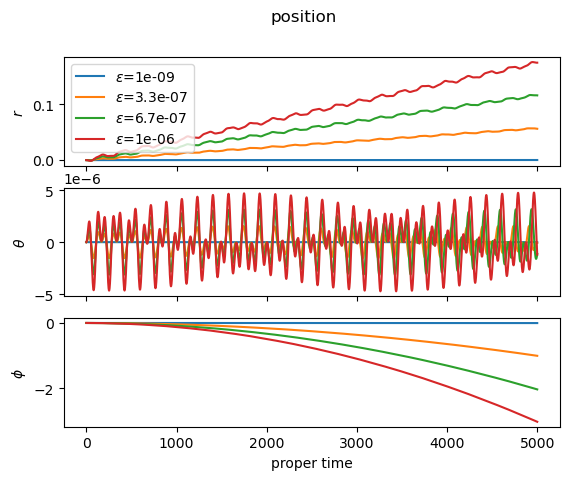

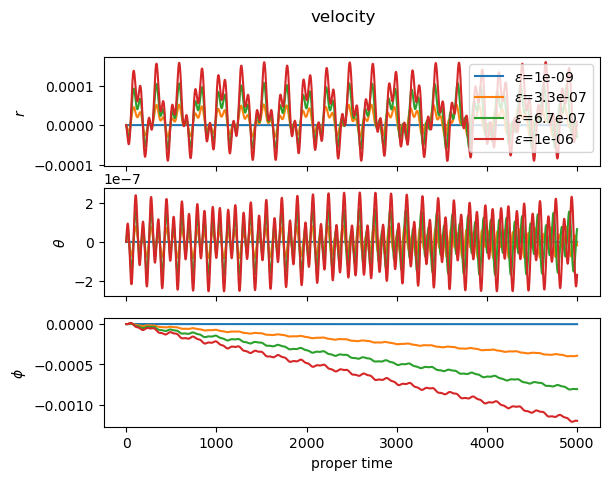

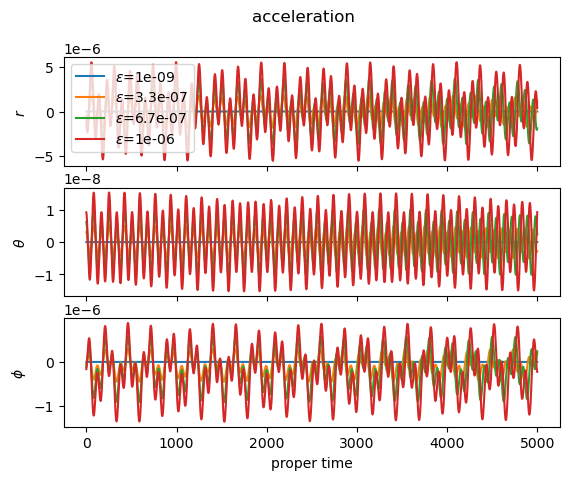

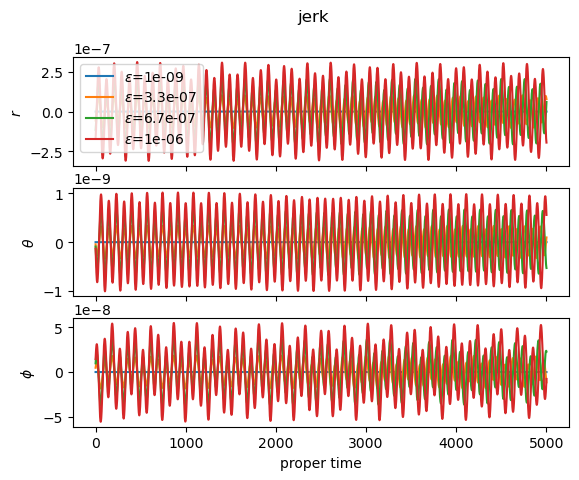

In [126]:
for var in ['pos','vel','acc','jerk']: #
    #fig_pert_stab_sols: 8x6 pert_stab_sol[j][i] vs pert_stab_t_arrays[i]
    fig_pert_stab_sols, axs_pert_stab=plt.subplots(3,1)
    # for c in range(4): # columns (not t),r,th,ph
    for i in range(1,len(eps_ar)):
        axs_pert_stab[0].plot(pert_stab_arrays['t'][i],pert_stab_arrays[var]['r'][i]-pert_stab_arrays[var]['r'][0],label=f"$\\epsilon$={eps_ar[i]}")
        axs_pert_stab[1].plot(pert_stab_arrays['t'][i],pert_stab_arrays[var]['theta'][i]-pert_stab_arrays[var]['theta'][0],label=f"$\\epsilon$={eps_ar[i]}")
        axs_pert_stab[2].plot(pert_stab_arrays['t'][i],pert_stab_arrays[var]['phi'][i]-pert_stab_arrays[var]['phi'][0],label=f"$\\epsilon$={eps_ar[i]}")
            # axs_pert_stab[1,c].plot(pert_stab_t_arrays[exp],del_r_arrays[exp],label="1e-%f" % exps[exp])# row for velocity
    axs_pert_stab[2].set_xlabel('proper time')
    axs_pert_stab[1].set_xticklabels([])# [1].set_xlabel('proper time')# sharex(axs_pert_stab[2])
    axs_pert_stab[0].set_xticklabels([])# [0].set_xlabel('proper time')# sharex(axs_pert_stab[2])
    axs_pert_stab[0].set_ylabel('$r$')
    axs_pert_stab[1].set_ylabel('$\\theta$')
    axs_pert_stab[2].set_ylabel('$\\phi$')
    axs_pert_stab[0].legend()
    # axs_pert_stab[1].legend()
    # axs_pert_stab[2].legend()
    # fig_pert_stab_sols.set_figheight(8)
    # fig_pert_stab_sols.set_figwidth(12)
    # fig_pert_stab_sols.suptitle(f"Point-Like Perturber ($\\theta_p,\\phi_p$)={theta_p,phi_p}\n tol=1e-12 a,p,e,x={a,p,e,x}\n$\\delta$ from unperturbed") 
    if var == 'pos':fig_pert_stab_sols.suptitle('position')
    if var == 'vel':fig_pert_stab_sols.suptitle('velocity')
    if var == 'acc':fig_pert_stab_sols.suptitle('acceleration')
    if var == 'jerk':fig_pert_stab_sols.suptitle('jerk')
    plt.savefig(f'PLpert_zp{np.cos(theta_p)}_phip{phi_p}_e{e}_x{x}_deltas_BL_{var}_t{tau_end}.pdf',format='pdf') #_long
    # plt.show()

    # #fig_pert_stab_sols: 8x6 pert_stab_sol[j][i] vs pert_stab_t_arrays[i]
    # fig_pert_stab_sols, axs_pert_stab=plt.subplots(1,3)
    # # for c in range(4): # columns (not t),r,th,ph
    # for i in range(len(eps_ar)):
    #     axs_pert_stab[0].plot(times,pert_stab_r_arrays[i]-base_r_arrays[4],label=f"$\\epsilon$={eps_ar[i]}")
    #     axs_pert_stab[1].plot(times,pert_stab_theta_arrays[i]-base_theta_arrays[4],label=f"$\\epsilon$={eps_ar[i]}")
    #     axs_pert_stab[2].plot(times,pert_stab_phi_arrays[i]-base_phi_arrays[4],label=f"$\\epsilon$={eps_ar[i]}")
    #         # axs_pert_stab[1,c].plot(pert_stab_t_arrays[exp],del_r_arrays[exp],label="1e-%f" % exps[exp])# row for velocity
    # axs_pert_stab[0].set_xticklabels([])# [0].set_xlabel('proper time')# sharex([2])
    # axs_pert_stab[0].set_ylabel('$r$')
    # axs_pert_stab[0].legend()
    # axs_pert_stab[1].set_xticklabels([])# [1].set_xlabel('proper time')# sharex([2])
    # axs_pert_stab[1].set_ylabel('$\\theta$')
    # axs_pert_stab[1].legend()
    # axs_pert_stab[2].set_xlabel('proper time')
    # axs_pert_stab[2].set_ylabel('$\\phi$')
    # axs_pert_stab[2].legend()
    # fig_pert_stab_sols.suptitle(f"Perturbed minus Unpert_staburbed")
    # # plt.savefig(f'PLpert_stab_zp{np.cos(theta_p)}minusBase_t{tau_end}.pdf',format='pdf')
    # plt.show()

    # #fig_t_div plot of t_div vs tol_exp
    # fig_t_div, ax_t_div=plt.subplots()
    # fig_t_div.suptitle('Proper Time to Divergence')
    # ax_t_div.stem(eps_ar,t_div,use_line_collection=True)
    # ax_t_div.set_xlabel('$\\epsilon$')
    # ax_t_div.set_ylabel('proper time')
    # # fig_t_div.set_figheight(10)
    # # fig_t_div.set_figwidth(14)
    # # plt.savefig(f'PLpert_stab_zp{np.cos(theta_p)}DivergenceTimes_t{tau_end}.pdf',format='pdf')
    # plt.show()

    # #fig_pert_stab_div: 8 subplots y_div vs t_div scatter plot labeled by exp
    # fig_y_div, axs_y_div=plt.subplots(1,2)
    # # sizes=10*
    # cbrdiv=axs_y_div[0].scatter(t_div,[val[1] for val in y_div],c=eps_ar,label='r')
    # # axs_y_div[0].scatter(t_div,[val[5] for val in y_div],marker='d',c=exps,label='dr/d$\\tau$')
    # axs_y_div[0].set_xticklabels([])# [0].set_xlabel('time of divergence')
    # axs_y_div[0].legend()
    # fig_y_div.colorbar(cbrdiv,ax=axs_y_div[0],extend='both')
    # cbthdiv=axs_y_div[1].scatter(t_div,[val[2] for val in y_div],c=eps_ar,label='$\\theta$')
    # # axs_y_div[1].scatter(t_div,[val[6] for val in y_div],marker='d',s=sizes,c=exps,label='d$\\theta$/d$\\tau$')
    # axs_y_div[1].set_xticklabels([])# [1].set_xlabel('time of divergence')
    # axs_y_div[1].legend()
    # fig_y_div.colorbar(cbthdiv,ax=axs_y_div[1],extend='both')
    # # plt.savefig(f'PLpert_stab_zp{np.cos(theta_p)}ValuesAtDivergence_t{tau_end}.pdf',format='pdf')
    # plt.show()

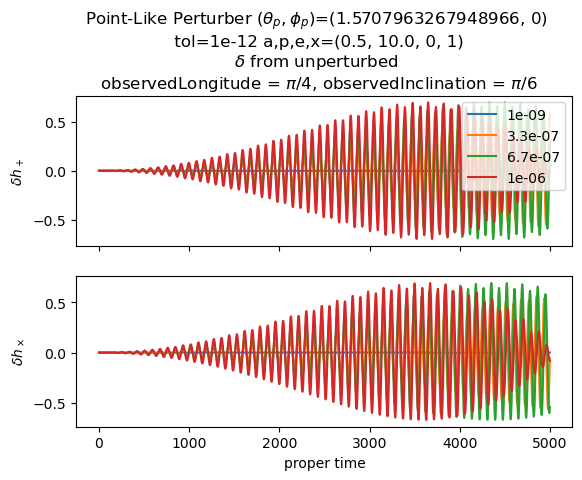

In [127]:
fig_pert_stab_kluge, (ax_pert_stab_k_hp,ax_pert_stab_k_hc)=plt.subplots(2,1)
for i in range(1,len(eps_ar)):# [1,len(eps_ar)-1]
    ax_pert_stab_k_hp.plot(times,pert_stab_arrays['hplus'][i]-pert_stab_arrays['hplus'][0],label=f'{eps_ar[i]}')#del_r_arrays[i]
    ax_pert_stab_k_hc.plot(times,pert_stab_arrays['hcross'][i]-pert_stab_arrays['hcross'][0],label=f'{eps_ar[i]}')#del_theta_arrays[i]

ax_pert_stab_k_hc.set_xlabel('proper time')
ax_pert_stab_k_hp.set_xticklabels([])# hp.set_xlabel('proper time')# sharex(ax_pert_stab_k_hc) # or coordinate time?
ax_pert_stab_k_hp.set_ylabel('$\\delta h_+$')
ax_pert_stab_k_hc.set_ylabel('$\\delta h_\\times$')
ax_pert_stab_k_hp.legend()
# ax_pert_stab_k_hc.legend()
# fig_pert_stab_kluge.set_figheight(8)
# fig_pert_stab_kluge.set_figwidth(12)
fig_pert_stab_kluge.subplots_adjust(top=0.8)
fig_pert_stab_kluge.suptitle(f"Point-Like Perturber ($\\theta_p,\\phi_p$)={theta_p,phi_p}\n tol=1e-12 a,p,e,x={a,p,e,x}\n$\\delta$ from unperturbed\n observedLongitude = $\\pi/4$, observedInclination = $\\pi/6$") 
plt.savefig(f'PLpert_zp{np.cos(theta_p)}_phip{phi_p}_e{e}_x{x}_delta_strain_t{tau_end}.pdf',format='pdf') #_long
# plt.show()
# eps=10**(-5) #eps_ar[3]
# # strong perturbations will cause accelerations too great for scipy's solver to integrate
# # 1e-5 diverges around t=6500 for r=12.8  
# theta_p,phi_p=np.pi/2,0
# PertST[(theta_p,phi_p)][eps]=Spacetime(a)
# PertST[(theta_p,phi_p)][eps].Add_Perturbation_Source('point',theta_p,phi_p,Epsilon=eps)
# PertG[(theta_p,phi_p)][eps]=PertST[(theta_p,phi_p)][eps].GeodesicConstructor(p,e,x)
# print(PertST[(theta_p,phi_p)][eps].NetPerturbation.z_array,PertG[(theta_p,phi_p)][eps].zs)  

In [120]:
# Test Convergence of Perturbed Trajectories
# exps=np.arange(8,14.) #exponents for the integration tolerances
eps=10**(-6)
pert_conv_arrays={
    't':[],
    'pos':{
        'r':[],
        'theta':[],
        'phi':[]
        },
    'vel': {
        'r':[],
        'theta':[],
        'phi':[]
        },
    'acc':{
        'r':[],
        'theta':[],
        'phi':[]
        },
    'jerk':{
        'r':[],
        'theta':[],
        'phi':[]
        },
    'hplus':[],
    'hcross':[]
}
for i in range(exps.size):
    rtol, atol = 10.**(-exps[i]), 10.**(-exps[i])

    pert_conv_sol=PertST[(theta_p,phi_p)][eps].run_Trajectory(PertG[(theta_p,phi_p)][eps].Trajectories[(0,0,0)],t_eval=times,rtol=rtol,atol=atol)
    #ODE(PertST[(theta_p,phi_p)][eps].IntRHS(),[0,tau_end],PertG[(theta_p,phi_p)][eps].Trajectories[(0,0,0)].ICs.flatten(),t_eval=times,rtol=rtol,atol=atol)#,args=PertG[(theta_p,phi_p)][eps].zs
    print(f"Perturbed with tol={rtol}: time to integrate {tau_end*10} steps: {time.perf_counter()-restart}")
    pert_conv_arrays['t'].append(times)
    pert_conv_arrays['pos']['r'].append(pert_conv_sol[0,1])
    pert_conv_arrays['pos']['theta'].append(pert_conv_sol[0,2])
    pert_conv_arrays['pos']['phi'].append(pert_conv_sol[0,3])
    # pert_conv_vt_arrays.append()
    pert_conv_arrays['vel']['r'].append(pert_conv_sol[1,1])
    pert_conv_arrays['vel']['theta'].append(pert_conv_sol[1,2])
    pert_conv_arrays['vel']['phi'].append(pert_conv_sol[1,3])
    # pert_conv_at_arrays.append()
    pert_conv_arrays['acc']['r'].append(pert_conv_sol[2,1])
    pert_conv_arrays['acc']['theta'].append(pert_conv_sol[2,2])
    pert_conv_arrays['acc']['phi'].append(pert_conv_sol[2,3])
    # pert_conv_jt_arrays.append()
    pert_conv_arrays['jerk']['r'].append(pert_conv_sol[3,1])
    pert_conv_arrays['jerk']['theta'].append(pert_conv_sol[3,2])
    pert_conv_arrays['jerk']['phi'].append(pert_conv_sol[3,3])
    # t_array_len= pert_conv_sol.t.size

    # pert_conv_kinematics=np.reshape(np.transpose(pert_conv_sol),(len(pert_conv_sol.t),4,4))
    pert_conv_hplusList, pert_conv_hcrossList=PertST[(theta_p,phi_p)][eps].calc_Strain(PertG[(theta_p,phi_p)][eps].Trajectories[(0,0,0)])# kluge_h(pert_conv_sol)
    pert_conv_arrays['hplus'].append(np.array(pert_conv_hplusList))
    pert_conv_arrays['hcross'].append(np.array(pert_conv_hcrossList))

Perturbed with tol=1e-09: time to integrate 50000 steps: 1828.3643447920003
Perturbed with tol=1e-10: time to integrate 50000 steps: 1846.8946932500003
Perturbed with tol=1e-11: time to integrate 50000 steps: 1873.572905084
Perturbed with tol=1e-12: time to integrate 50000 steps: 1913.6342583339992
Perturbed with tol=1e-13: time to integrate 50000 steps: 1976.7176020000006


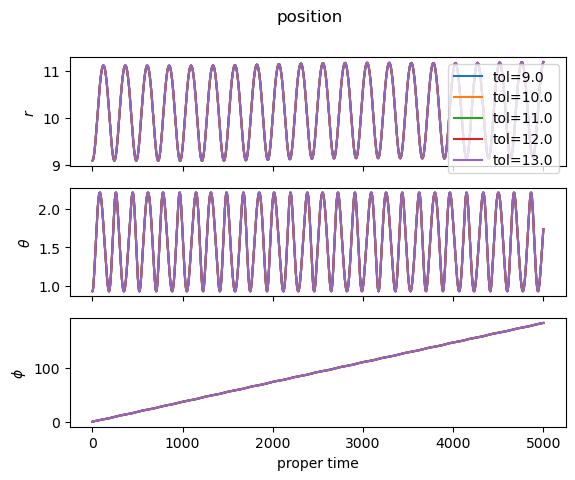

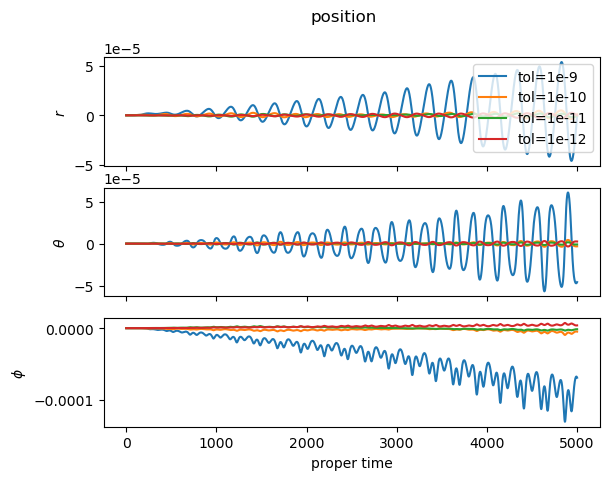

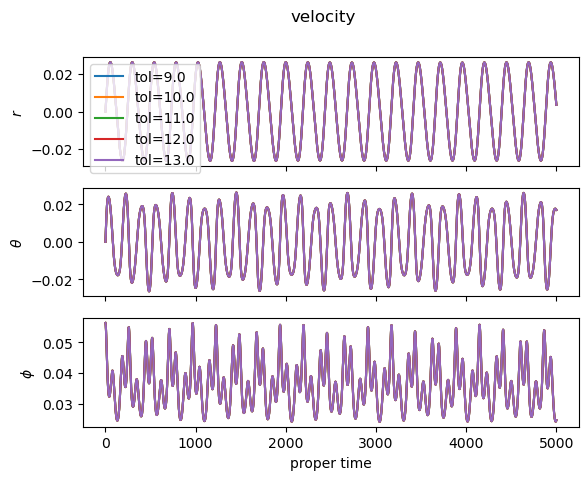

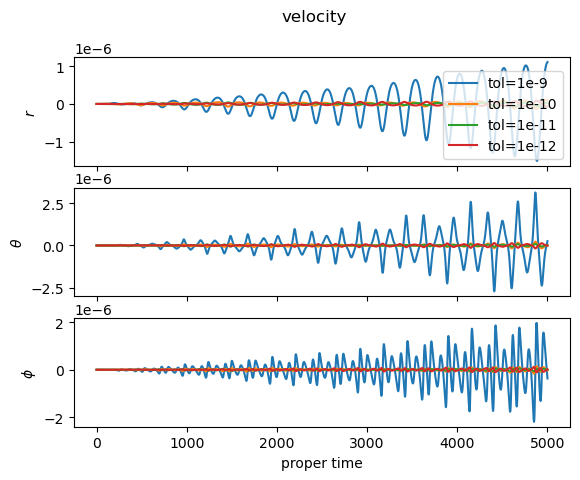

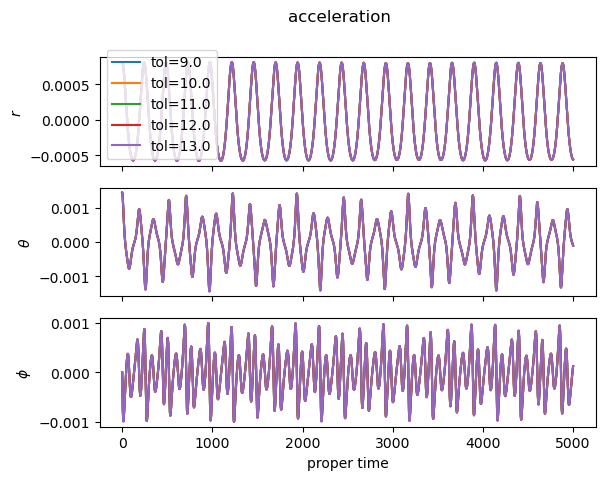

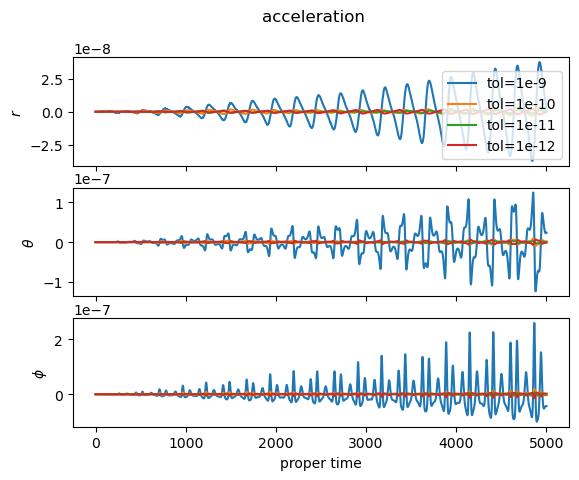

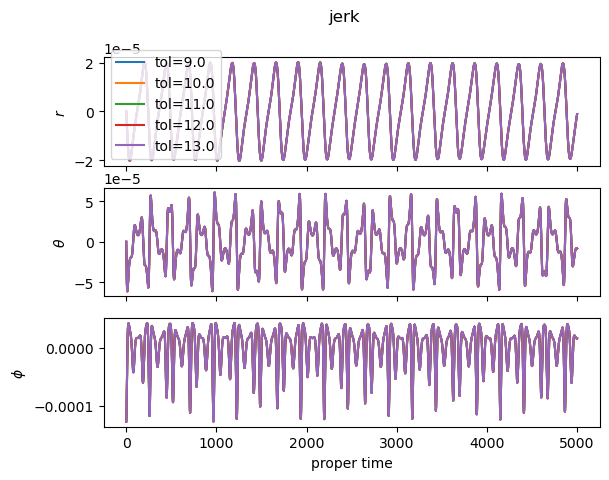

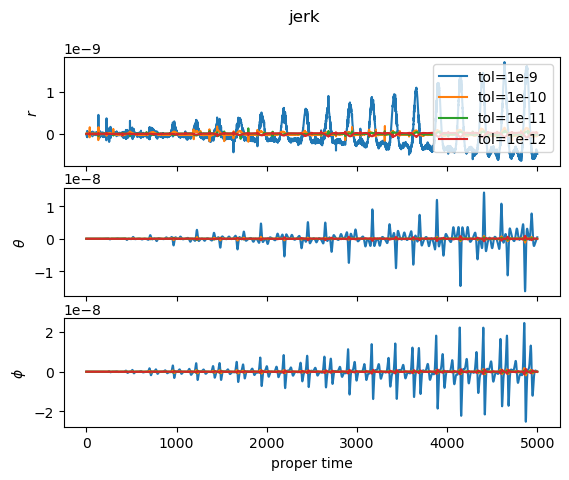

In [122]:
for var in ['pos','vel','acc','jerk']: #
    #fig_pert_conv_sols: 8x6 pert_conv_sol[j][i] vs pert_conv_t_arrays[i]
    fig_pert_conv_sols, axs_pert_conv=plt.subplots(3,1)
    # for c in range(4): # columns (not t),r,th,ph
    for exp in range(exps.size):# tol exp
        axs_pert_conv[0].plot(pert_conv_arrays['t'][exp],pert_conv_arrays[var]['r'][exp],label=f"tol={exps[exp]}")# f"$\\epsilon$={eps_ar[exp]}")
        axs_pert_conv[1].plot(pert_conv_arrays['t'][exp],pert_conv_arrays[var]['theta'][exp],label=f"tol={exps[exp]}")# f"$\\epsilon$={eps_ar[exp]}")
        axs_pert_conv[2].plot(pert_conv_arrays['t'][exp],pert_conv_arrays[var]['phi'][exp],label=f"tol={exps[exp]}")# f"$\\epsilon$={eps_ar[exp]}")
            # axs_pert_conv[1,c].plot(pert_conv_t_arrays[exp],del_r_arrays[exp],label="1e-%f" % exps[exp])# row for velocity
    axs_pert_conv[0].set_ylabel('$r$')
    axs_pert_conv[1].set_ylabel('$\\theta$')
    axs_pert_conv[2].set_ylabel('$\\phi$')
    axs_pert_conv[2].set_xlabel('proper time')
    axs_pert_conv[1].set_xticklabels([])# [1].set_xlabel('proper time')# sharex(axs_pert_conv[2])
    axs_pert_conv[0].set_xticklabels([])# [0].set_xlabel('proper time')# sharex(axs_pert_conv[2])
    axs_pert_conv[0].legend()
    # axs_pert_conv[1].legend()
    # axs_pert_conv[2].legend()
    # fig_pert_conv_sols.set_figheight(8)
    # fig_pert_conv_sols.set_figwidth(12)
    # fig_pert_conv_sols.suptitle(f"Point-Like Perturber ($\\theta_p,\\phi_p$)={theta_p,phi_p}\n $\\epsilon$={eps} a,p,e,x={a,p,e,x}") 
    if var == 'pos':fig_pert_conv_sols.suptitle('position')
    if var == 'vel':fig_pert_conv_sols.suptitle('velocity')
    if var == 'acc':fig_pert_conv_sols.suptitle('acceleration')
    if var == 'jerk':fig_pert_conv_sols.suptitle('jerk')
    plt.savefig(f'PLpert_conv_zp{np.cos(theta_p)}_Convergence_for_eps{eps}_BL_{var}_t{tau_end}.pdf',format='pdf')
    # plt.show()
        # #fig_pert_conv_sols: 8x6 pert_conv_sol[j][i] vs pert_conv_t_arrays[i]
        # fig_pert_conv_sols, axs_pert_conv=plt.subplots(1,3)
        # # for c in range(4): # columns (not t),r,th,ph
        # for exp in range(exps.size): # tol exp
        #     axs_pert_conv[0].plot(times,pert_conv_r_arrays[exp]-base_r_arrays[exp],label="1e-%d" % exps[exp])
        #     axs_pert_conv[1].plot(times,pert_conv_theta_arrays[exp]-base_theta_arrays[exp],label="1e-%d" % exps[exp])
        #     axs_pert_conv[2].plot(times,pert_conv_phi_arrays[exp]-base_phi_arrays[exp],label="1e-%d" % exps[exp])
        #         # axs_pert_conv[1,c].plot(pert_conv_t_arrays[exp],del_r_arrays[exp],label="1e-%f" % exps[exp])# row for velocity
        # axs_pert_conv[0].set_xticklabels([])# [0].set_xlabel('proper time')# sharex([2])
        # axs_pert_conv[0].set_ylabel('$r$')
        # axs_pert_conv[0].legend()
        # axs_pert_conv[1].set_xticklabels([])# [1].set_xlabel('proper time')# sharex([2])
        # axs_pert_conv[1].set_ylabel('$\\theta$')
        # axs_pert_conv[1].legend()
        # axs_pert_conv[2].set_xlabel('proper time')
        # axs_pert_conv[2].set_ylabel('$\\phi$')
        # axs_pert_conv[2].legend()
        # fig_pert_conv_sols.suptitle("Perturbed Deltas for eps=%f"%eps)
        # plt.show()

    # Deltas from lowest tolerance
    fig_pert_conv_sols, axs_pert_conv=plt.subplots(3,1)
    # for c in range(4): # columns (not t),r,th,ph
    for exp in range(exps.size-1): # tol exp
        axs_pert_conv[0].plot(pert_conv_arrays['t'][exp],pert_conv_arrays[var]['r'][exp]-pert_conv_arrays[var]['r'][-1],label="tol=1e-%d" % exps[exp])
        axs_pert_conv[1].plot(pert_conv_arrays['t'][exp],pert_conv_arrays[var]['theta'][exp]-pert_conv_arrays[var]['theta'][-1],label="tol=1e-%d" % exps[exp])
        axs_pert_conv[2].plot(pert_conv_arrays['t'][exp],pert_conv_arrays[var]['phi'][exp]-pert_conv_arrays[var]['phi'][-1],label="tol=1e-%d" % exps[exp])
            # axs_pert_conv[1,c].plot(pert_conv_t_arrays[exp],del_r_arrays[exp],label="1e-%f" % exps[exp])# row for velocity
    axs_pert_conv[0].set_ylabel('$r$')
    axs_pert_conv[1].set_ylabel('$\\theta$')
    axs_pert_conv[2].set_ylabel('$\\phi$')
    axs_pert_conv[2].set_xlabel('proper time')
    axs_pert_conv[1].set_xticklabels([])# [1].set_xlabel('proper time')# sharex([2])
    axs_pert_conv[0].set_xticklabels([])# [0].set_xlabel('proper time')# sharex([2])
    axs_pert_conv[0].legend()
    # axs_pert_conv[1].legend()
    # axs_pert_conv[2].legend()
    # fig_pert_conv_sols.set_figheight(8)
    # fig_pert_conv_sols.set_figwidth(12)
    # fig_pert_conv_sols.suptitle(f"Point-Like Perturber ($\\theta_p,\\phi_p$)={theta_p,phi_p}\n  $\\Delta$(tol=1e-{exps[-1]}) $\\epsilon$={eps} a,p,e,x={a,p,e,x}") 
    if var == 'pos':fig_pert_conv_sols.suptitle('position')
    if var == 'vel':fig_pert_conv_sols.suptitle('velocity')
    if var == 'acc':fig_pert_conv_sols.suptitle('acceleration')
    if var == 'jerk':fig_pert_conv_sols.suptitle('jerk')
    plt.savefig(f'PL_del13_zp{np.cos(theta_p)}_Convergence_for_eps{eps}_BL_{var}_t{tau_end}.pdf',format='pdf')
    # plt.show()

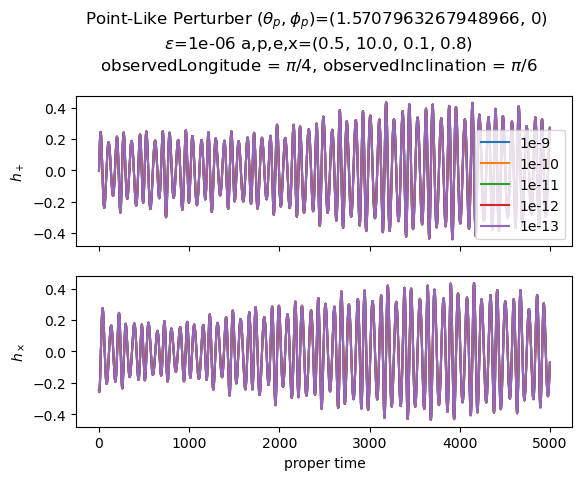

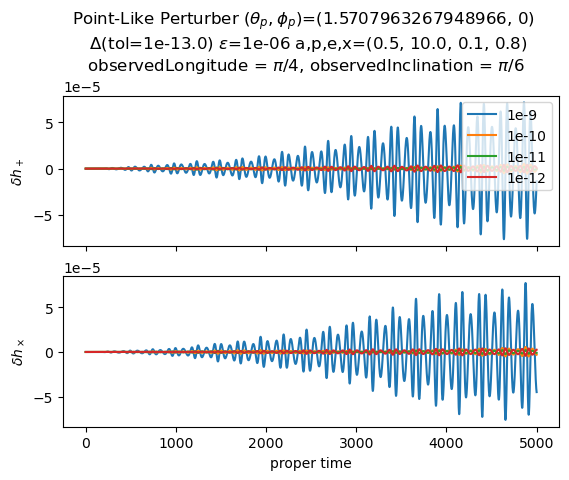

In [121]:
# h_plus, h_cross plots
fig_pert_conv_kluge, (ax_pert_conv_k_hp,ax_pert_conv_k_hc)=plt.subplots(2,1)
for i in range(exps.size):
    ax_pert_conv_k_hp.plot(times,pert_conv_arrays['hplus'][i],label="1e-%d" % exps[i])#del_r_arrays[i]
    ax_pert_conv_k_hc.plot(times,pert_conv_arrays['hcross'][i],label="1e-%d" % exps[i])#del_theta_arrays[i]

ax_pert_conv_k_hc.set_xlabel('proper time') # or coordinate time?
ax_pert_conv_k_hp.set_ylabel('$h_+$')
ax_pert_conv_k_hp.set_xticklabels([])# hp.set_xlabel('proper time')# sharex(ax_pert_conv_k_hc)
ax_pert_conv_k_hc.set_ylabel('$h_\\times$')
ax_pert_conv_k_hp.legend()
# ax_pert_conv_k_hc.legend()
fig_pert_conv_kluge.suptitle(f"Point-Like Perturber ($\\theta_p,\\phi_p$)={theta_p,phi_p}\n $\\epsilon$={eps} a,p,e,x={a,p,e,x}\n observedLongitude = $\\pi/4$, observedInclination = $\\pi/6$")
# fig_pert_conv_kluge.set_figheight(8)
# fig_pert_conv_kluge.set_figwidth(12)
fig_pert_conv_kluge.subplots_adjust(top=0.8)
plt.savefig(f'PLpert_conv_zp{np.cos(theta_p)}_Convergence_for_eps{eps}__strain_t{tau_end}.pdf',format='pdf')
# plt.show()
# Deltas
fig_pert_conv_del_kluge, (ax_pert_conv_del_k_hp,ax_pert_conv_del_k_hc)=plt.subplots(2,1)
for i in range(exps.size-1):
    ax_pert_conv_del_k_hp.plot(times,pert_conv_arrays['hplus'][i]-pert_conv_arrays['hplus'][-1],label="1e-%d" % exps[i])#del_r_arrays[i]
    ax_pert_conv_del_k_hc.plot(times,pert_conv_arrays['hcross'][i]-pert_conv_arrays['hcross'][-1],label="1e-%d" % exps[i])#del_theta_arrays[i]

ax_pert_conv_del_k_hc.set_xlabel('proper time') # or coordinate time?
ax_pert_conv_del_k_hp.set_ylabel('$\\delta h_+$')
ax_pert_conv_del_k_hp.set_xticklabels([])# hp.set_xlabel('proper time')# sharex(ax_pert_conv_del_k_hc)
ax_pert_conv_del_k_hc.set_ylabel('$\\delta h_\\times$')
ax_pert_conv_del_k_hp.legend()
# ax_pert_conv_del_k_hc.legend()
fig_pert_conv_del_kluge.suptitle(f"Point-Like Perturber ($\\theta_p,\\phi_p$)={theta_p,phi_p}\n  $\\Delta$(tol=1e-{exps[-1]}) $\\epsilon$={eps} a,p,e,x={a,p,e,x}\n observedLongitude = $\\pi/4$, observedInclination = $\\pi/6$")
# fig_pert_conv_del_kluge.set_figheight(8)
# fig_pert_conv_del_kluge.set_figwidth(12)
fig_pert_conv_del_kluge.subplots_adjust(top=0.8)
plt.savefig(f'PL_del13_zp{np.cos(theta_p)}_Convergence_for_eps{eps}_strain_t{tau_end}.pdf',format='pdf')
# plt.show()